In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
speeches = pd.read_csv(r"C:\Users\piacu\Documents\AdaLab\Prototype Fund\dataverse_files\CSV Files\speeches.csv")

In [3]:
politicians = pd.read_csv(r"C:\Users\piacu\Documents\AdaLab\Prototype Fund\dataverse_files\CSV Files\politicians.csv")

In [4]:
speeches.head()

,id,session,electoralTerm,politicianId,factionId,positionShort,positionLong,speechContent,date
0,1,2,1,-1,-1,Guest,präsident des bundesrats,"Der Bundesrat ist versammelt, Herr Präsident.\n",-640749600
1,3,2,1,-1,-1,Guest,bundespräsident,"Ja, ich habe den Wunsch.\n",-640749600
2,5,2,1,-1,-1,Guest,bundespräsident,"Verehrte Mitglieder des Bundestags, des Bundes...",-640749600
3,23,5,1,-1,-1,Chancellor,NaN,NaN,-640058400
4,123,7,1,-1,21,Member of Parliament,NaN,Meine Damen und Herren! Der Herr Bundeskanzler...,-639885600


In [5]:
politicians.head()

,id,firstName,lastName,gender,academicTitle,aristocracy,birthCountry,birthPlace,birthYear,deathYear,profession
0,-1,Not found,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11000001,Manfred,Abelein,männlich,Prof. Dr.,NaN,Deutschland,Stuttgart,1930-10-20,2008-01-17,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp..."
2,11000002,Ernst,Achenbach,männlich,Dr.,NaN,Deutschland,Siegen,1909-04-09,1991-12-02,Rechtsanwalt und Notar
3,11000003,Annemarie,Ackermann,weiblich,NaN,NaN,Jugoslawien,Parabutsch,1913-05-26,1994-02-18,Hilfsreferentin
4,11000004,Else,Ackermann,weiblich,Dr.,NaN,Deutschland,Berlin,1933-11-06,2019-09-14,Ärztin


In [6]:
len(speeches.index), len(politicians.index)

(896250, 4102)

In [20]:
w_count = 0
m_count = 0
count = 0

# count how many of the speeches were held by women
for index, row in speeches.iterrows():
    #if count > 1000:
    #    break
    speaker = politicians.loc[politicians['id'] == row['politicianId']]
    if speaker.id.iloc[0] == -1:
        # skip speeches where the speaker is not known
        continue
    if speaker.gender.iloc[0] == 'weiblich':
        w_count += 1
    else:
        #print(speaker.gender.iloc[0])
        m_count += 1
    #count += 1

In [35]:
w_count / m_count

0.31757097970955767

In [7]:
len(politicians.loc[politicians['gender'] == 'weiblich']) / len(politicians.loc[politicians['gender'] == 'männlich'])

0.26579925650557623

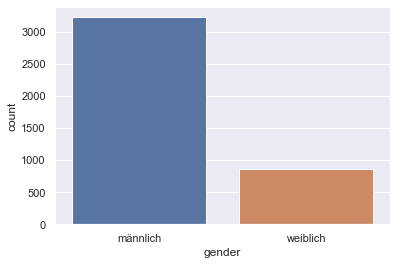

In [8]:
#plt.figure(figsize=[15,5])
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="gender", data=politicians)

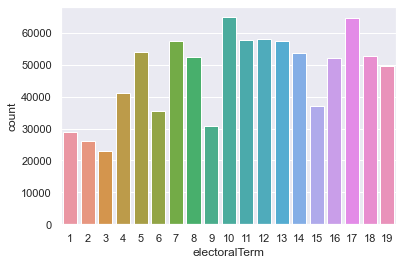

In [9]:
ax = sns.countplot(x="electoralTerm", data=speeches)

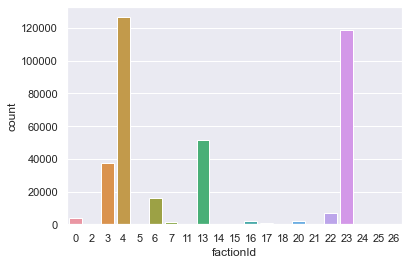

In [10]:
ax = sns.countplot(x="factionId", data=speeches.drop(speeches[speeches.factionId == -1].index))

## Recreate this graph
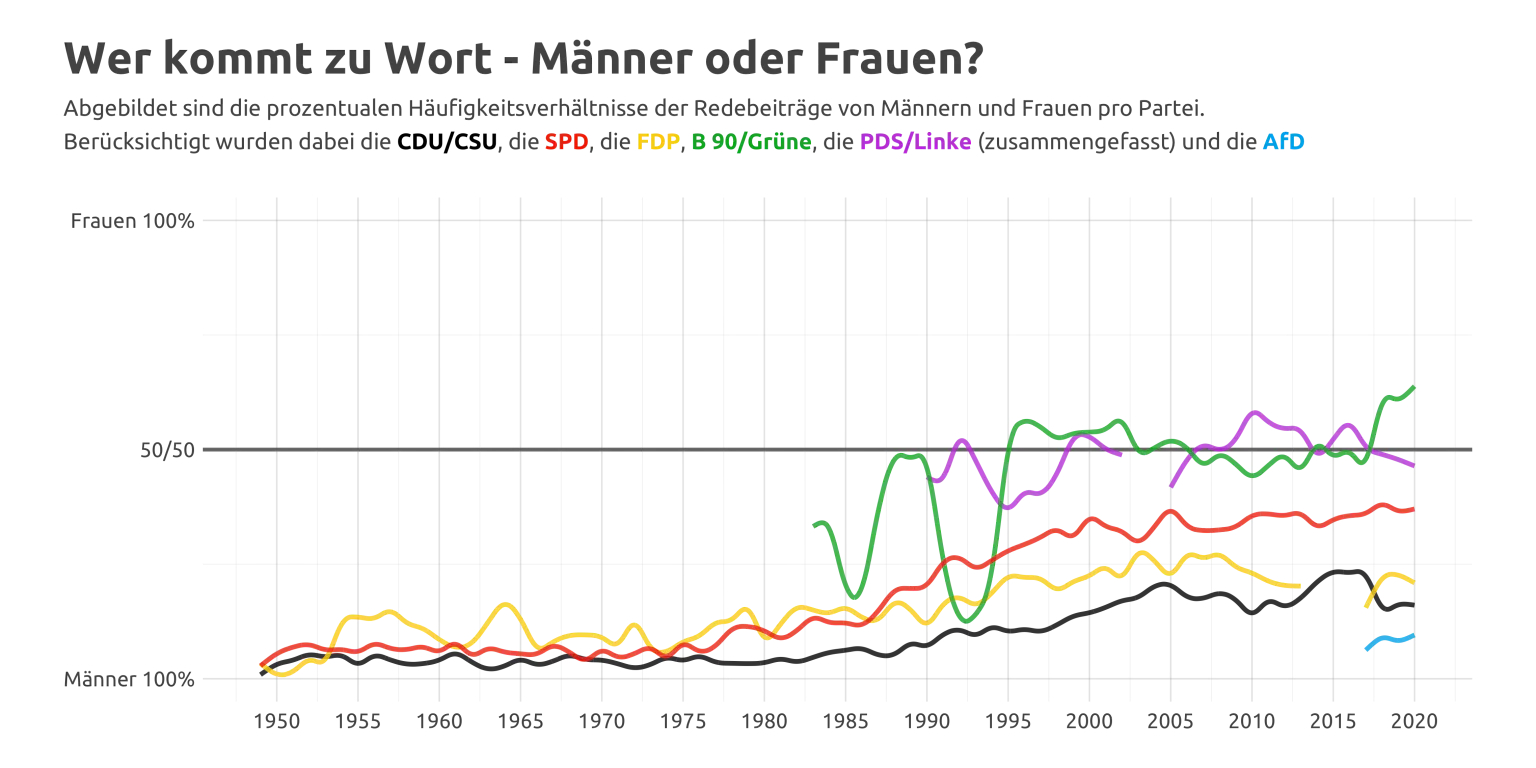

In [11]:
speeches.head()

,id,session,electoralTerm,politicianId,factionId,positionShort,positionLong,speechContent,date
0,1,2,1,-1,-1,Guest,präsident des bundesrats,"Der Bundesrat ist versammelt, Herr Präsident.\n",-640749600
1,3,2,1,-1,-1,Guest,bundespräsident,"Ja, ich habe den Wunsch.\n",-640749600
2,5,2,1,-1,-1,Guest,bundespräsident,"Verehrte Mitglieder des Bundestags, des Bundes...",-640749600
3,23,5,1,-1,-1,Chancellor,NaN,NaN,-640058400
4,123,7,1,-1,21,Member of Parliament,NaN,Meine Damen und Herren! Der Herr Bundeskanzler...,-639885600


In [12]:
speech_factions = speeches.loc[:, ["id", "session", "electoralTerm", "politicianId", "factionId"]]
speech_factions = speech_factions.drop(speech_factions[speech_factions.factionId == -1].index)
speech_factions = speech_factions.drop(speech_factions[speech_factions.politicianId == -1].index)
speech_factions.head()

,id,session,electoralTerm,politicianId,factionId
37867,127057,38,5,11000001,4
37868,127770,41,5,11000001,4
37869,127772,41,5,11000001,4
37870,128057,42,5,11000001,4
37871,142703,111,5,11000001,4


In [13]:
politicians.head()

,id,firstName,lastName,gender,academicTitle,aristocracy,birthCountry,birthPlace,birthYear,deathYear,profession
0,-1,Not found,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11000001,Manfred,Abelein,männlich,Prof. Dr.,NaN,Deutschland,Stuttgart,1930-10-20,2008-01-17,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp..."
2,11000002,Ernst,Achenbach,männlich,Dr.,NaN,Deutschland,Siegen,1909-04-09,1991-12-02,Rechtsanwalt und Notar
3,11000003,Annemarie,Ackermann,weiblich,NaN,NaN,Jugoslawien,Parabutsch,1913-05-26,1994-02-18,Hilfsreferentin
4,11000004,Else,Ackermann,weiblich,Dr.,NaN,Deutschland,Berlin,1933-11-06,2019-09-14,Ärztin


In [14]:
p_gender = politicians.loc[:, ["id", "gender"]]
p_gender.head()

,id,gender
0,-1,NaN
1,11000001,männlich
2,11000002,männlich
3,11000003,weiblich
4,11000004,weiblich


In [16]:
merged = speech_factions.merge(p_gender, left_on="politicianId", right_on="id", how="inner")
merged.head()

,id_x,session,electoralTerm,politicianId,factionId,id_y,gender
0,127057,38,5,11000001,4,11000001,männlich
1,127770,41,5,11000001,4,11000001,männlich
2,127772,41,5,11000001,4,11000001,männlich
3,128057,42,5,11000001,4,11000001,männlich
4,142703,111,5,11000001,4,11000001,männlich


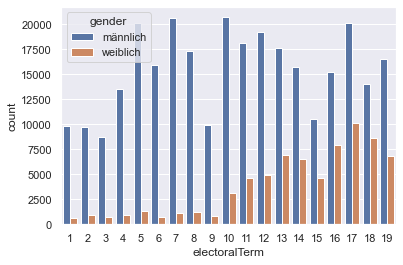

In [20]:
ax = sns.countplot(x="electoralTerm", hue="gender", data=merged)

In [81]:
counts = pd.DataFrame(merged.value_counts(subset=["electoralTerm", "factionId", "gender"]).reset_index())
counts.columns = ["electoralTerm", "factionId", "gender", "count"]

In [82]:
# only keep factions that are still in parliament
# OD merged PDS and Linke
filtered_counts = counts.loc[counts['factionId'].isin([4, 23, 13, 3, 6, 0])]
filtered_counts

,electoralTerm,factionId,gender,count
0,7,4,männlich,12550
1,8,4,männlich,10270
2,10,23,männlich,9909
3,6,4,männlich,9857
4,11,23,männlich,7493
...,...,...,...,...
156,3,13,weiblich,142
157,4,4,weiblich,139
159,3,4,weiblich,131
161,1,4,weiblich,103


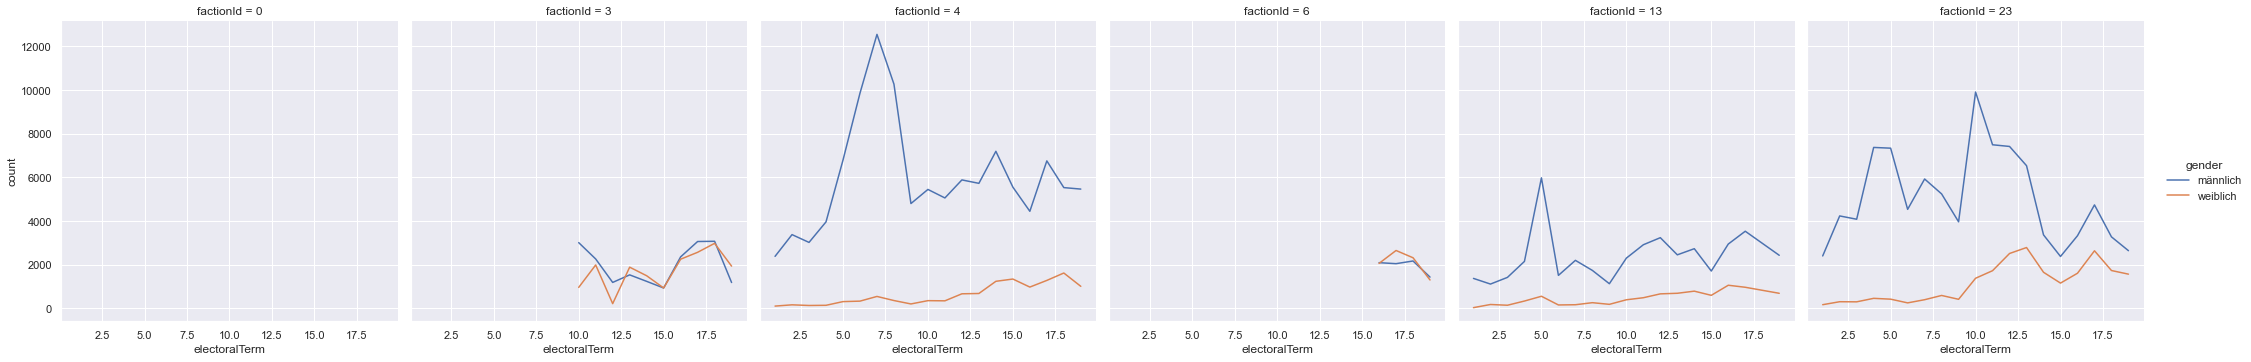

In [83]:
# plt.figure(figsize=[30,30])
ax = sns.relplot(col="factionId", x="electoralTerm", y="count", hue="gender",  kind="line", data=filtered_counts)

In [113]:
filtered_counts.groupby(by=["electoralTerm", "factionId"]).apply(lambda group: (group["gender"] == "männlich").mean())

electoralTerm  factionId
1              4            0.5
               13           0.5
               23           0.5
2              4            0.5
               13           0.5
                           ... 
19             3            0.5
               4            0.5
               6            0.5
               13           0.5
               23           0.5
Length: 71, dtype: float64

In [125]:
grouped = filtered_counts.groupby(by=["electoralTerm", "factionId"]).sum()
grouped

count
electoralTerm factionId       
1             4           2484
              13          1403
              23          2567
2             4           3538
              13          1288
...                        ...
19            3           3117
              4           6471
              6           2730
              13          3119
              23          4207

[71 rows x 1 columns]

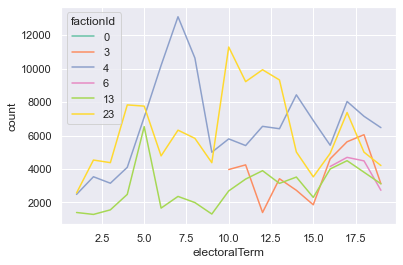

In [143]:
ax = sns.lineplot(x="electoralTerm", y="count", hue="factionId", data=grouped, palette="Set2")

In [136]:
filtered_counts.groupby(by=["electoralTerm", "factionId", "gender"]).apply(
    lambda group: (group["count"] / grouped.at[group["electoralTerm"], group["factionId"]]))

KeyError: 'electoralTerm'